# Comparando classificadores de redução de dimensionalidade

## Bibliotecas

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Dataset

**Attribute Information:**  
      Complete attribute documentation:  
      
      Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)  
      1: erythema  
      2: scaling  
      3: definite borders  
      4: itching  
      5: koebner phenomenon  
      6: polygonal papules  
      7: follicular papules  
      8: oral mucosal involvement  
      9: knee and elbow involvement  
     10: scalp involvement  
     11: family history, (0 or 1)  
     34: Age (linear)  

     Histopathological Attributes: (take values 0, 1, 2, 3)
     12: melanin incontinence
     13: eosinophils in the infiltrate
     14: PNL infiltrate
     15: fibrosis of the papillary dermis
     16: exocytosis
     17: acanthosis
     18: hyperkeratosis
     19: parakeratosis
     20: clubbing of the rete ridges
     21: elongation of the rete ridges
     22: thinning of the suprapapillary epidermis
     23: spongiform pustule
     24: munro microabcess
     25: focal hypergranulosis
     26: disappearance of the granular layer
     27: vacuolisation and damage of basal layer
     28: spongiosis
     29: saw-tooth appearance of retes
     30: follicular horn plug
     31: perifollicular parakeratosis
     32: inflammatory monoluclear inflitrate
     33: band-like infiltrate

In [4]:
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data"
)

In [44]:
dataset = pd.read_csv(url, header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [57]:
len(dataset[dataset[33]=='?'])

8

In [58]:
dataset = dataset[dataset[33] != '?']

In [59]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1]

## Isomap

In [9]:
from sklearn.manifold import Isomap

### Implementando o modelo

* 3D

In [61]:
### Passo 1 - configurar a funcao Isomap. 
embed3 = Isomap(
    # metric='manhattan',
    n_neighbors=5, # numero de vizinhos
    n_components=3 # numero de dimensoes
)

### Passo 2 - Ajusta os dados e os transforma de um espaco de 64 para 3 dimensoes
X_trans3 = embed3.fit_transform(X)
    
### Passo 3 - imprime o formato dos dados
print('O novo formato de  X: ',X_trans3.shape)

O novo formato de  X:  (358, 3)


### Visualizando os resultados

In [62]:
import plotly.express as px

# Cria uma plotagem 3D
fig = px.scatter_3d(None, 
                    x=X_trans3[:,0], y=X_trans3[:,1], z=X_trans3[:,2],
                    color=y.astype(str),
                    # color=[y_replace(n, n) for n in y],
                    height=900, width=900
                   )

# Ajusta o design da plotagem
fig.update_layout(#title_text="Plot 3D ",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# ajusta o tamanho dos marcadores
fig.update_traces(marker=dict(size=4))

fig.show()

       Class code:   Class:                  Number of instances:
       1             psoriasis			          112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    
       6             pityriasis rubra pilaris        20

### Verificando um número ótimo de componentes

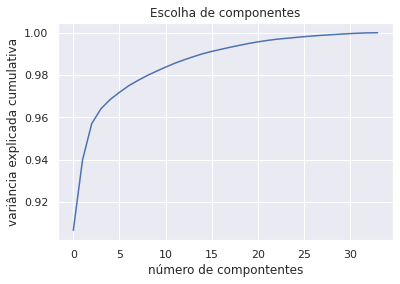

In [63]:
from sklearn.decomposition import PCA

pca = PCA().fit(X, y)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Escolha de componentes')
plt.xlabel('número de compontentes')
plt.ylabel('variância explicada cumulativa')

plt.show()

## KFDA

In [64]:
from kfda import Kfda

### Particionando os dados

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, random_state=42, stratify=y)

### Implementando o modelo

In [67]:
X_train.shape, y_train.shape

((214, 34), (214,))

In [68]:
kfda_model = Kfda(kernel='rbf', n_components=5)
kfda_model.fit(X_train, y_train)

/home/luis/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



Kfda(kernel='rbf', n_components=5)

### Avaliando o modelo

In [69]:
print('Resultados:')
test_score = kfda_model.score(X_test, y_test)
print(f'Sobre o conjunto de testes: {test_score}')
train_score = kfda_model.score(X_train, y_train)
print(f'Sobre o conjunto de treinamento: {train_score}')

Resultados:
Sobre o conjunto de testes: 0.9166666666666666
Sobre o conjunto de treinamento: 1.0


### Oneshot Learning